In [30]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

Run tensorboard by command:
tensorboard --logdir="./logs"

In [53]:
# 导入SummaryWriter
from torch.utils.tensorboard import SummaryWriter

# 创建SummaryWriter实例，指定log_dir的位置
summaryWriter = SummaryWriter(log_dir="./logs")

In [24]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), 1)  # Create a tensor with shape (100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # Create y = x^2 + noisy

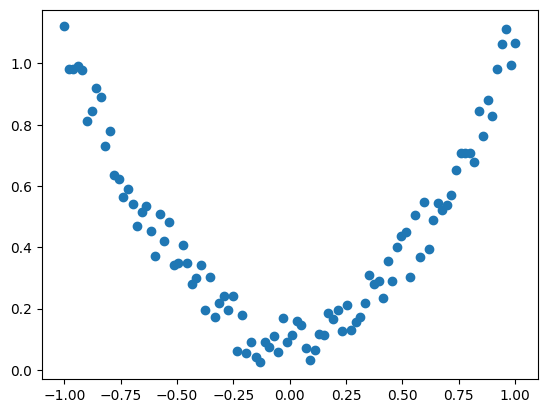

In [29]:
# Visualization
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [32]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output) -> None:
        super(Net, self).__init__()
        # Define Layer modules
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

In [59]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [61]:
# Training
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_function = torch.nn.MSELoss()

losses = []

for i in range(100):
    prediction = net(x)
    loss = loss_function(prediction, y)

    optimizer.zero_grad()   # Clean optimizer
    loss.backward()     # Backpropagation
    optimizer.step()    # Update parameters

    losses.append(loss.item())
    summaryWriter.add_scalar("loss", loss.item(), i)



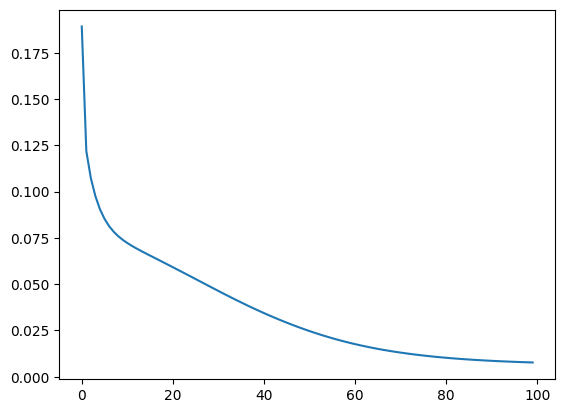

In [62]:
plt.plot(losses)